In [26]:
from qiskit import *
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Pauli
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector

In [67]:
#Implementing Grover from section 7.2.1

#First implement U_f

def build_U_f(n, a: str):
    assert len(a) == n, 'length of a does not match n'
    aux = n - 2
    N = n + 1 + aux
    qc = QuantumCircuit(N, n)
    for i, bit in enumerate(a):
        if bit == '0':
            qc.x(i)
    for t in range(n - 1):
        qc.ccx(n - 1 + t, n - 2 - t, n + t)
    for t in reversed(range(n - 2)):
        qc.ccx(n - 1 + t, n - 2 - t, n + t)
    for i, bit in enumerate(a):
        if bit == '0':
            qc.x(i)
    return qc

def build_W(n: int):
    aux = n - 3
    N = n + aux
    print(N)
    W = QuantumCircuit(N)
    for i in range(n):
        W.h(i)
        W.x(i)
    for t in range(0, n - 3):
        print(t)
        print(n+t)
        W.ccx(n - 1 + t, n - 2 - t, n + t)
    W.ccz(N - 1, 1, 0)
    for t in reversed(range(n - 3)):
        W.ccx(n - 1 + t, n - 2 - t, n + t)
    for i in range(n):
        W.x(i)
        W.h(i)
    return W




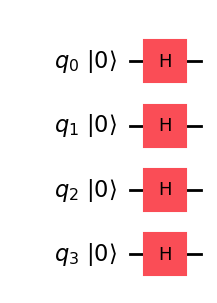

In [64]:
W = QuantumCircuit(4)
for i in range(4):
    W.h(i)

W.draw(output='mpl', cregbundle=False, initial_state=True)

3


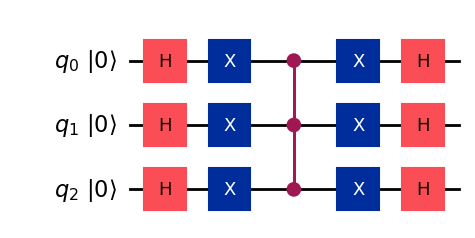

In [68]:
build_U_f(4, '1010').draw(output='mpl', cregbundle=False, initial_state=True)
build_W(3).draw(output='mpl', cregbundle=False, initial_state=True)

In [4]:
a = '10'
for i in a:
    print(i)
    print(type(int(i)))

1
<class 'int'>
0
<class 'int'>
